In [40]:
from jmp.lightning_datamodule import (
    MPTrjAlexOMAT24DataModule,
    MPTrjAlexOMAT24DataModuleConfig,
)

config = MPTrjAlexOMAT24DataModuleConfig.draft()
config.mptrj = True
config.salex = True
config.omat24 = False
config.filter_small_systems = False
config.batch_size = 1
config.num_workers = 0
config = config.finalize()

dm = MPTrjAlexOMAT24DataModule(config)
dm.prepare_data()

In [41]:
dl = dm.train_dataloader()
dl_iter = iter(dl)
print(len(dl))

12007681


In [42]:
import torch
from tqdm.auto import trange

compositions_list = []
energies_list = []

for i in trange(10_000):
    batch = next(dl_iter)
    atomic_numbers = batch["atomic_numbers"]
    compositions = torch.bincount(atomic_numbers.long(), minlength=120)
    compositions_list.append(compositions)
    energies_list.append(batch["y"])

compositions = torch.stack(compositions_list)
energies = torch.stack(energies_list)

print(compositions.shape)
print(energies.shape)


  0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 120])
torch.Size([10000, 1])


<Axes: ylabel='Count'>

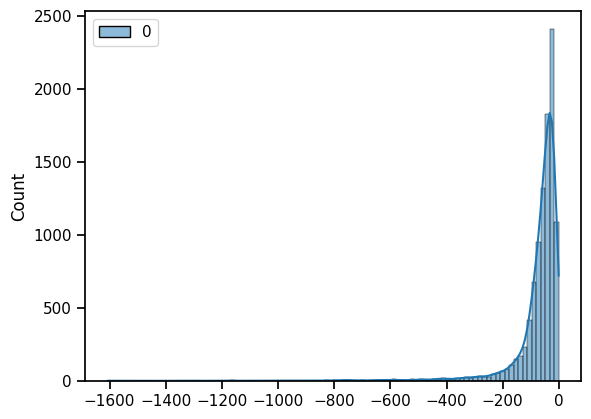

In [43]:
import seaborn as sns

sns.set_context("notebook")

sns.histplot(energies.numpy(), bins=100, kde=True)

In [44]:
from sklearn.linear_model import Ridge

linref = Ridge(alpha=0.1, fit_intercept=False).fit(
    compositions.numpy(), energies.numpy()
)
linref

Ridge(alpha=0.1, fit_intercept=False)

In [50]:
linref.coef_[0]

array([  0.        ,  -3.19632944,   0.        ,  -3.22903825,
        -3.4321923 ,  -8.54963505,  -8.21912231,  -7.82596271,
        -8.15980732,  -5.48451319,   0.        ,  -1.92389368,
        -2.76271599,  -5.3120897 ,  -8.02025208,  -6.04943914,
        -5.23934992,  -3.77581433,   0.        ,  -1.88926125,
        -3.75665007,  -6.73422178, -10.56271143,  -8.62793216,
       -10.04809267,  -9.39307645,  -8.42822494,  -6.45131522,
        -5.55473823,  -3.0273028 ,  -1.07085828,  -3.62846269,
        -5.19110932,  -4.47061375,  -4.43178095,  -3.25182845,
         0.        ,  -1.78962784,  -3.45718957,  -7.34124406,
        -9.80208533, -11.53411857,  -9.81590563,  -9.21266206,
        -8.48274068,  -7.36403744,  -5.49053822,  -1.80308964,
        -0.68814472,  -2.73383012,  -3.98184504,  -3.98556685,
        -3.66313852,  -2.29445121,  12.63440351,  -1.13195211,
        -4.00979174,  -6.09136034,  -7.49387444,  -4.78571954,
        -5.07974607,  -4.35258884,  -4.60995601, -11.92